In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")

In [2]:
df = pd.read_excel('FantasyHistoricalStats.xlsx')

df['TotalWins'] = df.Wins + df.PlayoffWins
df['TotalLosses'] = df.Losses + df.PlayoffLosses
df['TotalGames'] = df.TotalWins + df.TotalLosses
df['RegSeasonPPG'] = df.PtsScored / (df.Wins + df.Losses)
df['TotalPtsScored'] = df.PtsScored + df.PlayoffPtsScored
df['TotalPPG'] = (df.PtsScored + df.PlayoffPtsScored) / (df.TotalGames)

df

,Team,Wins,Losses,PtsScored,PtsAgainst,PlayoffWins,PlayoffLosses,PlayoffPtsScored,PlayoffPtsAgainst,Year,TotalWins,TotalLosses,TotalGames,RegSeasonPPG,TotalPtsScored,TotalPPG
0,David,11,3,1509.02,1254.60,1,1,203.59,208.02,2018,12,4,16,107.787143,1712.61,107.038125
1,Mom,7,7,1399.64,1337.96,0,1,84.54,90.36,2018,7,8,15,99.974286,1484.18,98.945333
2,Kevin,4,10,1272.80,1413.26,0,0,0.00,0.00,2018,4,10,14,90.914286,1272.80,90.914286
3,Chris,11,3,1643.24,1267.76,0,1,78.42,82.76,2018,11,4,15,117.374286,1721.66,114.777333
4,David,7,7,1286.84,1279.98,0,0,0.00,0.00,2019,7,7,14,91.917143,1286.84,91.917143
5,Mom,6,8,1315.22,1296.30,0,0,0.00,0.00,2019,6,8,14,93.944286,1315.22,93.944286
6,Kevin,11,3,1563.44,1426.42,0,1,123.58,160.38,2019,11,4,15,111.674286,1687.02,112.468000
7,Chris,10,4,1294.02,1136.38,0,1,71.28,86.60,2019,10,5,15,92.430000,1365.30,91.020000
8,Blake,9,5,1402.40,1375.16,1,1,200.86,231.00,2020,10,6,16,100.171429,1603.26,100.203750
9,David,6,8,1268.48,1221.02,0,0,0.00,0.00,2020,6,8,14,90.605714,1268.48,90.605714


In [3]:
group = df.groupby('Team').aggregate({'Wins': 'sum', 'Losses': 'sum',
                                      'PlayoffWins': 'sum', 'PlayoffLosses': 'sum',
                                      'PtsScored': 'sum',
                                      'TotalWins': 'sum', 'TotalLosses': 'sum',
                                      'TotalPtsScored': 'sum'})\
                          .rename(columns = {'Wins': 'RegSeasonWins', 'Losses': 'RegSeasonLosses', 
                                             'PtsScored': 'RegSeasonPoints'})

# get yearly averages
# group['WinsAvg'] = group.TotalWins / group.YearsPlayed
# group['LossAvg'] = group.TotalLosses / group.YearsPlayed
group['TotalPtsPPG'] = np.round(group.TotalPtsScored / (group.TotalWins + group.TotalLosses), 2)
group['RegSeasonPPG'] = np.round(group.RegSeasonPoints/ (group.RegSeasonWins + group.RegSeasonLosses), 2)

group

,RegSeasonWins,RegSeasonLosses,PlayoffWins,PlayoffLosses,RegSeasonPoints,TotalWins,TotalLosses,TotalPtsScored,TotalPtsPPG,RegSeasonPPG
Team,,,,,,,,,,
Blake,16,12,1,1,2686.54,17,13,2887.40,96.25,95.95
Chris,51,33,0,3,8042.88,51,36,8263.06,94.98,95.75
David,45,39,5,1,7876.62,50,40,8509.07,94.55,93.77
Kevin,45,39,0,3,8119.42,45,42,8387.66,96.41,96.66
Mom,39,45,0,2,7812.42,39,47,7967.30,92.64,93.00


In [4]:
df.iloc[df.PtsScored.idxmax()].to_frame().transpose()

,Team,Wins,Losses,PtsScored,PtsAgainst,PlayoffWins,PlayoffLosses,PlayoffPtsScored,PlayoffPtsAgainst,Year,TotalWins,TotalLosses,TotalGames,RegSeasonPPG,TotalPtsScored,TotalPPG
3,Chris,11,3,1643.24,1267.76,0,1,78.42,82.76,2018,11,4,15,117.374286,1721.66,114.777333


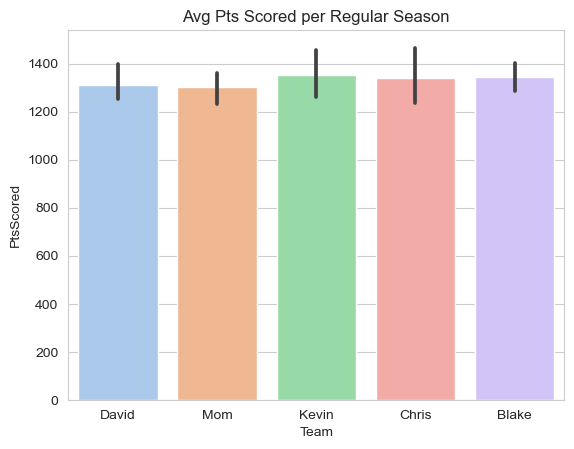

In [5]:
plt.figure()
sns.barplot(data = df, x = 'Team', y = 'PtsScored')

plt.title("Avg Pts Scored per Regular Season")
plt.show()

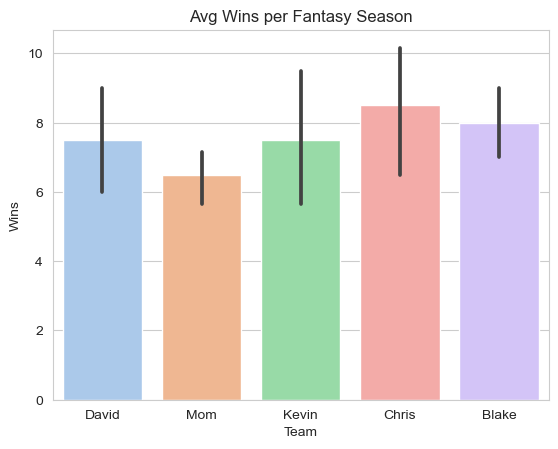

In [6]:
plt.figure()
sns.barplot(data = df, x = 'Team', y = 'Wins')

plt.title("Avg Wins per Fantasy Season")
plt.show()

# Game BreakDown

In [7]:
df = pd.read_excel('./FantasyHistoricalStats.xlsx', sheet_name = 'WeeklyStats')
df.tail()

,Team,Opponent,TeamPts,OpponentPoints,Playoffs,Week,Year
191,David,Chris,78.98,83.36,No,11.0,2023.0
192,David,Luol Deng,75.82,84.18,No,12.0,2023.0
193,David,Susan,69.00,104.06,No,13.0,2023.0
194,David,Mighty K Hunts,106.74,65.08,No,14.0,2023.0
195,David,Susan,115.42,70.34,Yes,15.0,2023.0


In [8]:
weekly_breakdown = df.pivot_table(index = ['Week', 'Year'], columns = ['Team'], values = 'TeamPts').reset_index()


weekly_breakdown['ChrisWon'] = weekly_breakdown.apply(lambda x: 1 if x['Chris'] > x['David'] else 0, axis = 1)
weekly_breakdown['DavidWon'] = weekly_breakdown.apply(lambda x: 1 if x['David'] > x['Chris'] else 0, axis = 1)

weekly_breakdown.sort_values(by = ['Year', 'Week']).tail()

Team,Week,Year,Chris,David,ChrisWon,DavidWon
65,11.0,2023.0,83.36,78.98,1,0
71,12.0,2023.0,91.24,75.82,1,0
77,13.0,2023.0,55.80,69.00,0,1
83,14.0,2023.0,54.42,106.74,0,1
89,15.0,2023.0,81.64,115.42,0,1


In [9]:
chris_wins = weekly_breakdown.ChrisWon.sum()
david_wins = weekly_breakdown.DavidWon.sum()

print(f"Chris' Records vs David: {chris_wins} - {david_wins}")

Chris' Records vs David: 48 - 47


In [10]:
print("Chris' Lowest Score:", weekly_breakdown.Chris.min())
print("Chris' Highest Score:", weekly_breakdown.Chris.max())

Chris' Lowest Score: 54.42
Chris' Highest Score: 198.0


In [11]:
print("David's Lowest Score:", weekly_breakdown.David.min())
print("David's Highest Score:", weekly_breakdown.David.max())

David's Lowest Score: 51.56
David's Highest Score: 130.86
